In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Scikit-Learn
**Facundo A. Lucianna - Inteligencia Artificial - CEIA - FIUBA**

Aprovechando que estamos comenzando a introducirnos en el aprendizaje automático, presentaremos una de las bibliotecas más conocidas en este ámbito: [Scikit-Learn](https://scikit-learn.org/stable/). Esta librería ofrece herramientas simples y eficientes para el análisis de datos y la construcción de modelos de Machine Learning, tanto para principiantes como para expertos. Facilita tareas como clasificación, regresión y clustering, y proporciona una amplia gama de funciones que simplifican el desarrollo de todas las etapas del ciclo de vida del Machine Learning.

## Ciclo de vida del Machine Learning

El ciclo de vida que vimos en los videos tiene la siguiente estructura:

![proceso ML](./img/proceso_ml.png)

Este ciclo se divide en los siguientes pasos:

- **Preprocesamiento**: Consiste en preparar los datos antes de entrenar el modelo. Esto incluye limpieza de datos, tratamiento de valores nulos, normalización, transformación y codificación de variables categóricas.
- **Entrenamiento**: En esta etapa, el modelo aprende patrones a partir de los datos de entrenamiento utilizando algoritmos de Machine Learning. Se ajustan los parámetros del modelo para mejorar su precisión.
- **Evaluación**: Una vez entrenado el modelo, se evalúa su rendimiento utilizando un conjunto de datos de prueba. Se calculan distintas métricas para determinar su efectividad.
- **Predicción**: Finalmente, una vez que el modelo ha sido entrenado y evaluado, se utiliza para hacer predicciones sobre nuevos datos. Esta es la etapa en la que el modelo se aplica en situaciones del mundo real.

Scikit-Learn está diseñado para asistirnos en cada una de estas etapas. En esta notebook, exploraremos algunas de las herramientas que nos ofrece. Solo haremos una introducción superficial, ya que aún no hemos abordado en profundidad los modelos, lo cual haremos en los módulos siguientes.

> ⚠️ **Nota**: No olvides instalar la librería scikit-learn en tu entorno virtual. Si usás conda, podés ejecutarlo con:
> 
> ```bash
> conda install -y scikit-learn
> ```

----

### Preprocesamiento

En general, un problema de aprendizaje consiste en tomar un conjunto de N **muestras de datos** e intentar predecir propiedades de **datos desconocidos**. Si cada muestra no es solo un número, sino que, por ejemplo, es una entrada multidimensional, se dice que tiene varios **atributos o características**.

Una parte fundamental del rol del Data Scientist es construir este conjunto de datos de manera adecuada. Veamos qué herramientas nos ofrece Scikit-Learn para tareas de preprocesamiento. Pero primero, necesitamos una fuente de datos. Para eso, podemos usar los conjuntos de datos de ejemplo que proporciona Scikit-Learn.

En este caso, trabajaremos con el famoso conjunto de [dataset Iris](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset), que contiene información sobre tres especies de flores (Setosa, Versicolor y Virginica), con cuatro características por flor: **largo y ancho del sépalo**, **largo y ancho del pétalo**. Este dataset es muy utilizado para practicar técnicas de clasificación y preprocesamiento.

In [2]:
from sklearn import datasets 
iris = datasets.load_iris()

Veamos una parte del conjunto de datos:

In [3]:
iris.data[:5, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Como podemos ver, es un array de NumPy. Para ver qué representa cada columna:

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

También contamos con los **labels** correspondientes a esas observaciones:

In [5]:
# Labels de las primeras 5 observaciones, que son todas setosa
iris.target[:5]

array([0, 0, 0, 0, 0])

Estos son una codificación numérica de las categorías verdaderas:

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

El orden de los números corresponde a cómo están codificadas las etiquetas:

In [7]:
label_dict = {
    0: "setosa",
    1: "versicolor",
    2: "virginica"
}

Podemos guardar estos datos en un **DataFrame** de Pandas:

In [8]:
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

# Agregamos la columna de etiquetas
df_iris["label"] = iris.target
df_iris["label"] = df_iris["label"].apply(lambda x: label_dict[x])

In [9]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Grafiquemos los datos para visualizarlos. Para ello, elegimos dos columnas:

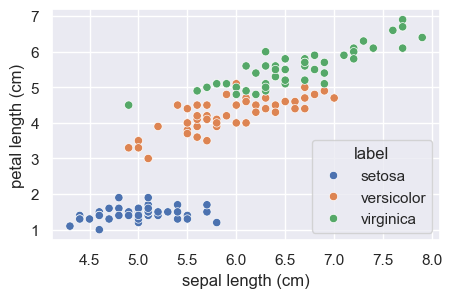

In [10]:
plt.figure(figsize=(5, 3))
# Usamos seaborn
sns.scatterplot(data=df_iris, x="sepal length (cm)", y="petal length (cm)", hue="label")

plt.show()

Con este conjunto de datos, almacenamos los datos en variables para su uso posterior. Siguiendo la nomenclatura de Scikit-Learn, usamos `X` para los atributos e `y` para las etiquetas:

In [11]:
# Guardamos los arrays de NumPy
X = iris.data
y = iris.target

También podemos guardar los datos en un **DataFrame** y una **Series** de Pandas, para demostrar que Scikit-Learn acepta ambos formatos (aunque usualmente devuelve arrays de NumPy):

In [12]:
X_df = df_iris.drop(columns="label")
y_df = df_iris["label"]

Con estos datos separados, ya podemos aplicar algún preprocesamiento. Scikit-Learn nos ofrece una amplia [variedad de herramientas](https://scikit-learn.org/stable/modules/preprocessing.html).

Veamos, por ejemplo, un proceso de estandarización de atributos. No te preocupes si aún no comprendés todos los detalles; en los próximos módulos profundizaremos más en estos conceptos. Por ahora, simplemente pensemos que esta herramienta nos permite escalar todos los atributos a una escala similar, sin perder la información más relevante: cómo varían entre sí.

In [13]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler

StandardScaler()

Scikit-Learn, en notebooks, muestra un pequeño recuadro con información sobre la herramienta que estemos utilizando. En este caso, aparece en color naranja porque aún no está configurada (si estas viendo directo de GitHub no vas a poder ver este recuadro).

Para configurar este preprocesador, debemos pasarle algunos datos para que calcule sus parámetros. Esto nos introduce a uno de los métodos más conocidos de Scikit-Learn: `.fit()`, que se utiliza para configurar preprocesadores. Más adelante, cuando entrenemos modelos, este método indicará que se inicie el proceso de entrenamiento.

Configuramos nuestro preprocesador:

In [14]:
scaler.fit(X)

StandardScaler()

Ahora veremos que Scikit-Learn muestra el recuadro en azul, indicando que el preprocesador ya está configurado. Luego, usando el método `.transform()`, podemos transformar nuestros datos:

In [15]:
scaler.transform(X)[:5, :]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

> 🧠 **Nota**: No te preocupes aún por los valores numéricos ni por cómo cambiaron. En el siguiente módulo volveremos sobre este tema para entenderlo en mayor profundidad.

Observá que este preprocesador también acepta DataFrames de Pandas, aunque puede mostrar una *advertencia (warning)*, ya que cuando se configuró con un array de NumPy, los atributos no tenían nombres, mientras que ahora los datos provienen de un DataFrame, que sí tiene nombres de columnas:

In [16]:
scaler.transform(X_df)[:5, :]

/Users/facundolucianna/anaconda3/envs/ia_env2/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

Si queremos evitar esta advertencia, podemos crear un escalador separado para el DataFrame. Además, podemos realizar la configuración y la transformación en un solo paso utilizando `fit_transform()`, que combina `fit()` y `transform()`:

In [17]:
scaler_df = preprocessing.StandardScaler()
X_scaled_df = scaler_df.fit_transform(X_df)

X_scaled_df[:5, :]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

Grafiquemos los datos luego del preprocesamiento:

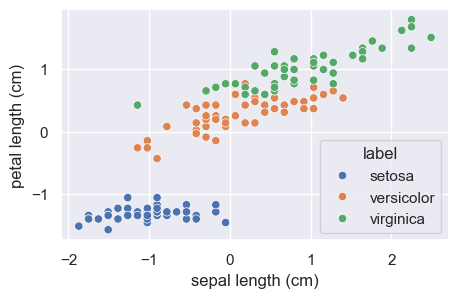

In [18]:
df_temp = df_iris.copy()
df_temp[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']] = X_scaled_df

plt.figure(figsize=(5, 3))
sns.scatterplot(data=df_temp, x="sepal length (cm)", y="petal length (cm)", hue="label")
plt.show()

Observá que la escala de los atributos cambió respecto a la original, pero la distribución de los puntos se mantiene.

Scikit-Learn también ofrece preprocesadores para variables categóricas. En este caso, podemos aplicar uno a nuestro **label** como ejemplo. Vamos a usar una técnica que transforma una variable categórica en un conjunto de variables numéricas:

In [19]:
ordinal_encoder = preprocessing.OneHotEncoder()
ordinal_encoder.fit_transform(y_df.array.reshape(-1, 1)).toarray()[:5, :]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

> ⚠️ **Nota**: Insisto en que, por ahora, no buscamos entender en profundidad lo que hace este preprocesador, sino simplemente explorar ejemplos de lo que Scikit-Learn nos ofrece. Si te pica la curiosidad, podés consultar la documentación oficial de [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder).

También existen otros preprocesadores muy útiles, como los que permiten realizar [imputaciones](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer) en caso de que falten valores. Aunque en este caso no lo necesitaremos, es una herramienta fundamental para datasets más complejos.

### Separación del dataset

En esta etapa, además de preparar el dataset, debemos separarlo en conjuntos de entrenamiento y evaluación. Scikit-Learn también nos ayuda con esto mediante la función [`train_test_split`](https://scikit-learn.org/1.4/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split).  

Por ejemplo, separemos el dataset destinando un 30% para evaluación:

In [20]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

print("Valores de X_train:",X_train.shape[0])
print("Valores de y_train:",y_train.shape[0])
print("Valores de X_test:",X_test.shape[0])
print("Valores de y_test:",y_test.shape[0])

Valores de X_train: 105
Valores de y_train: 105
Valores de X_test: 45
Valores de y_test: 45


Los conjuntos de entrenamiento y evaluación se separan aleatoriamente entre las observaciones. Si observamos los primeros valores del conjunto de entrenamiento:

In [21]:
X_train[:5, :]

array([[5.5, 4.2, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.9, 2.4, 3.3, 1. ],
       [6. , 2.7, 5.1, 1.6],
       [5.5, 2.3, 4. , 1.3]])

Si repetimos la separación, obtendremos datos distintos:

In [22]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

X_train[:5, :]


array([[6.9, 3.1, 5.4, 2.1],
       [6.7, 3.1, 4.7, 1.5],
       [6.8, 3. , 5.5, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5. , 3.4, 1.6, 0.4]])

Muchas veces, aunque la separación sea aleatoria, queremos que sea reproducible, es decir, que cada vez que ejecutemos esa función, obtengamos el mismo resultado. Para eso, podemos usar el argumento `random_state`, que permite fijar una semilla. Al establecer un valor específico, garantizamos que la distribución en los conjuntos de entrenamiento y evaluación se mantenga igual:

In [23]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

X_train[:5, :]

array([[5.5, 2.4, 3.7, 1. ],
       [6.3, 2.8, 5.1, 1.5],
       [6.4, 3.1, 5.5, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [7.2, 3.6, 6.1, 2.5]])

In [24]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

X_train[:5, :]

array([[5.5, 2.4, 3.7, 1. ],
       [6.3, 2.8, 5.1, 1.5],
       [6.4, 3.1, 5.5, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [7.2, 3.6, 6.1, 2.5]])

Cuando enfrentamos un problema de clasificación, muchas veces es importante que la proporción de clases se mantenga tanto en el conjunto de entrenamiento como en el de evaluación, especialmente si una de las clases tiene pocas observaciones. Esto ayuda a mejorar la generalización y reducir el riesgo empírico. Scikit-Learn nos ofrece el argumento `stratify` para estos casos.

Veamos primero un ejemplo sin usar stratify:

In [25]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_df, y_df, test_size=0.3, random_state=42)

In [26]:
print("Proporción de clases de dataset:")
print(y_df.value_counts())

print("\nProporción de clases del conjunto de entrenamiento:")
print(y_train.value_counts())

print("\nProporción de clases del conjunto de evaluación:")
print(y_test.value_counts())

Proporción de clases de dataset:
label
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Proporción de clases del conjunto de entrenamiento:
label
versicolor    37
virginica     37
setosa        31
Name: count, dtype: int64

Proporción de clases del conjunto de evaluación:
label
setosa        19
versicolor    13
virginica     13
Name: count, dtype: int64


Observá que, al no usar `stratify`, por azar el conjunto de entrenamiento resultó con menos observaciones de la clase `setosa`, mientras que el de evaluación tiene más, a pesar de que el dataset original tenía una distribución uniforme de clases.

Veamos ahora cómo se comporta usando `stratify`, pasando los labels del dataset como argumento:

In [27]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_df, y_df, test_size=0.3, stratify=y_df, 
                                                                    random_state=42)

print("Proporción de clases de dataset:")
print(y_df.value_counts())

print("\nProporción de clases del conjunto de entrenamiento:")
print(y_train.value_counts())

print("\nProporción de clases del conjunto de evaluación:")
print(y_test.value_counts())

Proporción de clases de dataset:
label
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Proporción de clases del conjunto de entrenamiento:
label
versicolor    35
setosa        35
virginica     35
Name: count, dtype: int64

Proporción de clases del conjunto de evaluación:
label
virginica     15
versicolor    15
setosa        15
Name: count, dtype: int64


Ahora, la proporción de clases se mantiene en ambos conjuntos (aunque la selección sigue siendo aleatoria). Este proceso puede ser un poco más lento que una separación normal y, en general, si no tenemos un caso particular que lo requiera, no siempre es necesario usarlo.

> 🧠 **Nota**: Si sos un avispado lector, tal vez hayas notado que no estás obligado a pasar los labels originales para hacer la separación estratificada; también podés usar otras etiquetas. Sin embargo, esto corresponde a situaciones más avanzadas y específicas.

### Entrenamiento

**Scikit-learn** nos ofrece una amplia gama de modelos para entrenar. Dado que aún no hemos estudiado ninguno en profundidad, vamos a usar un modelo de clasificación como si fuera una caja negra. En este caso, utilizaremos un clasificador basado en vecinos cercanos, que clasifica una observación en función de cómo son sus vecinos.

In [28]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)

model

KNeighborsClassifier()

Este modelo tiene un hiperparámetro que, como vimos en los videos, debemos definir antes de usarlo. Este hiperparámetro indica cuántos vecinos se consideran para determinar a qué clase pertenece una observación.

Para entrenar el modelo, usamos el método `fit()`. Como este es un problema de aprendizaje supervisado, debemos pasarle tanto los atributos como las etiquetas (labels):

In [29]:
model.fit(X_train, y_train)

KNeighborsClassifier()

Una vez entrenado, Scikit-Learn indica que el modelo ya ha sido ajustado. Lo interesante es que, sin importar qué modelo usemos en Scikit-Learn, el procedimiento es siempre el mismo: instanciamos el modelo con sus hiperparámetros y luego lo entrenamos con `.fit()`.

### Evaluación

Una vez completado el proceso de entrenamiento, debemos calcular métricas para evaluar si fue exitoso, si hubo algún problema o si estamos ante un caso de overfitting o underfitting. Esto lo hacemos mediante la métrica de evaluación que hayamos elegido. Vamos a calcularla tanto en el conjunto de entrenamiento como en el de evaluación para analizar si el modelo generaliza correctamente.

Primero, obtenemos las predicciones del modelo. Para ello, Scikit-Learn nos permite usar el método `predict()`, al que solo debemos pasarle los atributos, ya que ahora estamos prediciendo:

In [30]:
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

print("Los primeros 5 valores predichos del conjunto de evaluación son:")
print(y_pred[:5])
print("Los primeros 5 valores reales del conjunto de evaluación son:")
print(y_test.array[:5])

Los primeros 5 valores predichos del conjunto de evaluación son:
['virginica' 'versicolor' 'virginica' 'versicolor' 'virginica']
Los primeros 5 valores reales del conjunto de evaluación son:
<NumpyExtensionArray>
['virginica', 'versicolor', 'virginica', 'versicolor', 'virginica']
Length: 5, dtype: object


Veamos gráficamente los valores del conjunto de entrenamiento, comparando las etiquetas reales con las predichas:

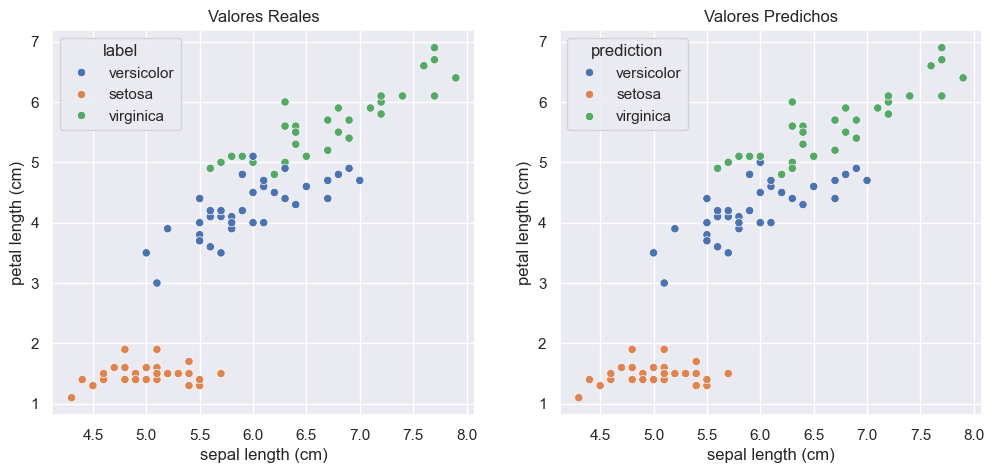

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

temp_df = X_train.copy()
temp_df["label"] = y_train
temp_df["prediction"] = y_train_pred

# Scatter plot con los valores reales
sns.scatterplot(data=temp_df, x="sepal length (cm)", y="petal length (cm)", hue="label", ax=axes[0])
axes[0].set_title('Valores Reales')

# Scatter plot con los valores predichos
sns.scatterplot(data=temp_df, x="sepal length (cm)", y="petal length (cm)", hue="prediction", ax=axes[1])
axes[1].set_title('Valores Predichos')

plt.show()

Ahora calculemos una métrica. Scikit-Learn nos ofrece una gran variedad de [métricas](https://scikit-learn.org/stable/api/sklearn.metrics.html). En este caso, utilizaremos la tasa de acierto, que nos indica cuántas veces el modelo predijo correctamente:

In [32]:
from sklearn.metrics import accuracy_score

En general, todas las métricas se usan de la misma manera: el primer valor que debe ir es el valor verdadero (ground truth), y el segundo es la predicción del modelo:

In [33]:
print("La tasa de acierto en el conjunto de entrenamiento es:", accuracy_score(y_train, y_train_pred))
print("La tasa de acierto en el conjunto de evaluación es:", accuracy_score(y_test, y_pred))

La tasa de acierto en el conjunto de entrenamiento es: 0.9714285714285714
La tasa de acierto en el conjunto de evaluación es: 0.9777777777777777


Vemos que, en este caso, ambas métricas son muy buenas. Es decir, este modelo se ajusta bien a los datos y logra generalizar. Si hubiéramos obtenido métricas bajas en ambos conjuntos, estaríamos ante un caso de *subajuste (underfitting)*. Si la métrica en entrenamiento fuera significativamente mejor que en evaluación, estaríamos frente a un caso de *sobreajuste (overfitting)*.

En tales situaciones, deberíamos revisar nuestros pasos previos, modificar el preprocesamiento, el modelo utilizado, sus hiperparámetros, etc. Para evitar llegar al último paso sin una idea clara del rendimiento, podemos utilizar técnicas de validación cruzada que nos ayuden a elegir modelos o hiperparámetros de forma más robusta.

> ⚠️ **Nota**: Estos resultados tan buenos se deben a que estamos utilizando un dataset de juguete, diseñado específicamente para probar herramientas. Es muy poco común alcanzar este nivel de rendimiento en problemas reales.

### Predicción

En nuestro caso, el modelo generaliza correctamente, por lo que ya estaría listo para pasar a producción. No olvidemos que, en Machine Learning, construimos modelos con el objetivo de realizar predicciones.

Si cerramos la notebook ahora, perderíamos todo lo realizado. Para evitar tener que reentrenar el modelo cada vez que queramos usarlo, podemos persistirlo. En este caso, utilizaremos [**joblib**](https://joblib.readthedocs.io/en/stable/, que es una de las múltiples formas de hacerlo:

In [34]:
import joblib

with open('modelo.pkl', 'wb') as archivo:
    joblib.dump(model, archivo)

Si deseamos recuperar el modelo, podemos hacerlo de la siguiente manera:

In [35]:
with open('modelo.pkl', 'rb') as archivo:
    modelo_cargado = joblib.load(archivo)

Una vez cargado, podemos utilizarlo para realizar predicciones:

In [36]:
X_pred = pd.DataFrame({"sepal length (cm)": [5.8, 4.7],
                       "sepal width (cm)": [2.9, 3.3],
                       "petal length (cm)": [4.9, 1.4],
                       "petal width (cm)": [1.8, 0.2], 
                       })

predicciones = modelo_cargado.predict(X_pred) 
predicciones

array(['virginica', 'setosa'], dtype=object)